The dataset gives us electronics sales data at Amazon. It contains user ratings for various electronics items sold, along with category of each item and time of sell.

In [50]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Importing the dataset
dataset = pd.read_csv('/content/electronics.csv')
dataset

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
131501,2606,124739,2.0,2013-02-23,Female&Male,Television & Video,NaN,2013.0,NaN,0.0
131502,2486,124740,1.0,2013-02-23,Female,Computers & Accessories,NaN,2012.0,Female,0.0
131503,2293,124741,5.0,2013-02-23,Female,Accessories & Supplies,NaN,2012.0,NaN,0.0
131504,2486,124742,5.0,2013-02-23,Female,Computers & Accessories,NaN,2012.0,Male,0.0


In [52]:
# list of first five rows
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0


In [53]:
# list of last five rows
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
131501,2606,124739,2.0,2013-02-23,Female&Male,Television & Video,NaN,2013.0,NaN,0.0
131502,2486,124740,1.0,2013-02-23,Female,Computers & Accessories,NaN,2012.0,Female,0.0
131503,2293,124741,5.0,2013-02-23,Female,Accessories & Supplies,NaN,2012.0,NaN,0.0
131504,2486,124742,5.0,2013-02-23,Female,Computers & Accessories,NaN,2012.0,Male,0.0
131505,2148,106036,5.0,2013-02-23,Fem,NaN,NaN,NaN,NaN,NaN


In [54]:
# shape
dataset.shape

(131506, 10)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131506 entries, 0 to 131505
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   item_id     131506 non-null  int64  
 1   user_id     131506 non-null  int64  
 2   rating      131506 non-null  float64
 3   timestamp   131506 non-null  object 
 4   model_attr  131506 non-null  object 
 5   category    131505 non-null  object 
 6   brand       57057 non-null   object 
 7   year        131505 non-null  float64
 8   user_attr   13605 non-null   object 
 9   split       131505 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 10.0+ MB


We can see that the columns User ID and Rating are of int64 data type, while the columns Product ID and Category are of object data type.
We can also see that there are no null values in the dataset.
And also the column Timestamp is of int64 data type, but it is actually a timestamp.

In [56]:
# We can convert it to a timestamp using the following code:
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

0        1999-06-13
1        1999-06-14
2        1999-06-17
3        1999-07-01
4        1999-07-06
            ...    
131501   2013-02-23
131502   2013-02-23
131503   2013-02-23
131504   2013-02-23
131505   2013-02-23
Name: timestamp, Length: 131506, dtype: datetime64[ns]

In [57]:
# The column Product ID is of object data type, but it is actually a string.
dataset['brand'] = dataset['brand'].astype(str)

In [58]:
# The column Category is of object data type, but it is actually a string.
dataset['category'] = dataset['category'].astype(str)

In [59]:
# The column Timestamp is of int64 data type, but it is actually a timestamp.
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [60]:
# The column Rating is of int64 data type, but it is actually a float.
dataset['rating'] = dataset['rating'].astype(float)

In [61]:
# The column User ID is of int64 data type, but it is actually a string.
dataset['user_id'] = dataset['user_id'].astype(str)

In [62]:
# The column Product ID is of object data type, but it is actually a string.
dataset['item_id'] = dataset['item_id'].astype(str)

In [63]:
# Statistical summary of the dataset.
dataset.describe()

,rating,year,split
count,131506.000000,131505.000000,131505.000000
mean,3.957979,2008.988153,0.064355
std,1.378113,2.725781,0.339244
min,1.000000,1999.000000,0.000000
25%,3.000000,2008.000000,0.000000
50%,5.000000,2009.000000,0.000000
75%,5.000000,2011.000000,0.000000
max,5.000000,2018.000000,2.000000


In [64]:
# Check for missing values
dataset.isnull().sum()

item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand              0
year               1
user_attr     117901
split              1
dtype: int64

In [65]:
# The distribution of ratings
dataset['rating'].value_counts()

5.0    68242
4.0    28380
1.0    15104
3.0    11104
2.0     8676
Name: rating, dtype: int64

most of the ratings are 5

In [66]:
# What was the best year of sales
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year
dataset['year'].value_counts()

2012    38389
2011    23894
2010    16888
2013    15295
2009    12804
2008     9428
2007     6798
2006     2614
2005     2170
2004     1275
2003      833
2002      481
2001      403
2000      187
1999       47
Name: year, dtype: int64

2015 was the best year of sales

In [67]:
# What was the best month of sales
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month
dataset['month'].value_counts()

1     20769
12    18710
2     14166
11    11398
10     9477
9      9218
8      8694
7      8205
3      8186
5      7790
6      7570
4      7323
Name: month, dtype: int64

January was the best month of sales

In [68]:
# rop all null values
dataset.dropna(inplace=True)

In [69]:
# Check for missing values
dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

FINDING ANSWERS WITH THE DATA WE HAVE WITH VISUALIZATIONS

<Axes: xlabel='rating', ylabel='count'>

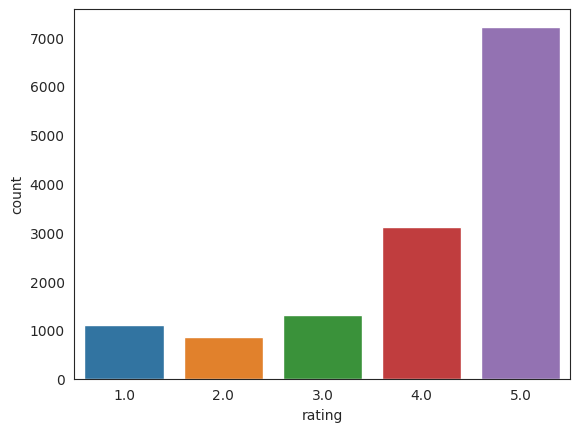

In [70]:
# The distribution of ratings 
sns.countplot(x='rating', data=dataset)

In [71]:
# The distribution of ratings
dataset['rating'].value_counts()

5.0    7214
4.0    3105
3.0    1315
1.0    1108
2.0     863
Name: rating, dtype: int64

<Axes: xlabel='year', ylabel='count'>

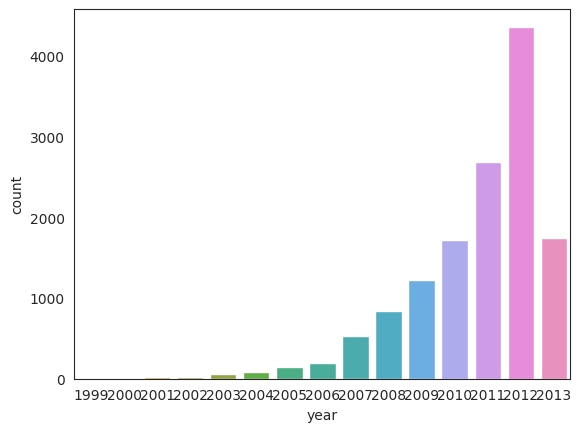

In [72]:
# The distribution of sales by year
sns.countplot(x='year', data=dataset)

2015 was the best year of sales

<Axes: xlabel='brand', ylabel='count'>

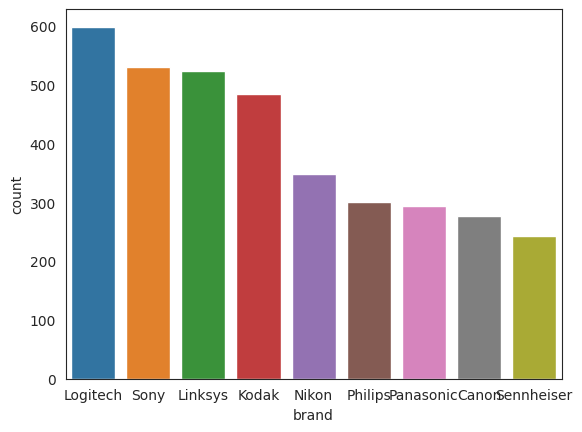

In [73]:
# Brands with the most sales
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)  

<Axes: xlabel='brand', ylabel='count'>

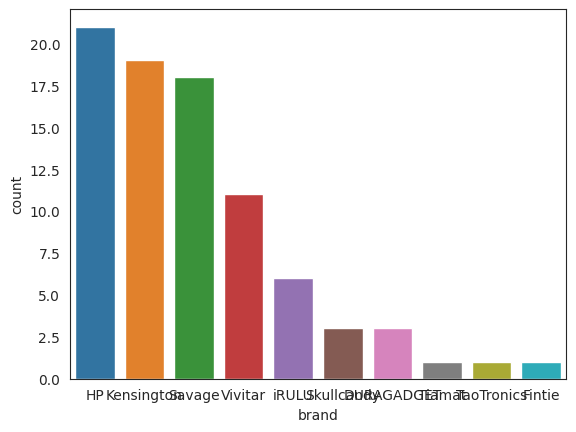

In [74]:
# What brand name sold the least?
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)

<Axes: xlabel='month', ylabel='count'>

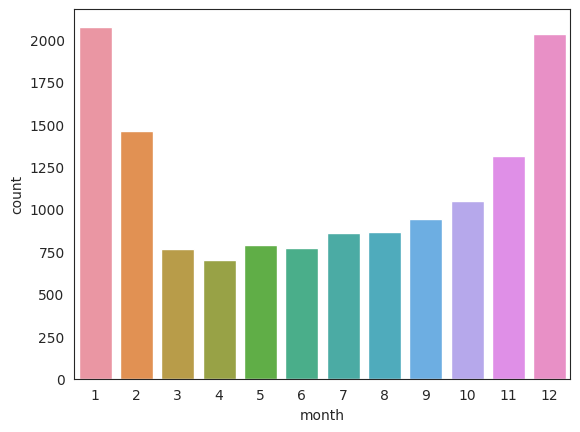

In [75]:
# Month with most sales
sns.countplot(x='month', data=dataset)

January was the month with the most sales

<Axes: xlabel='category', ylabel='count'>

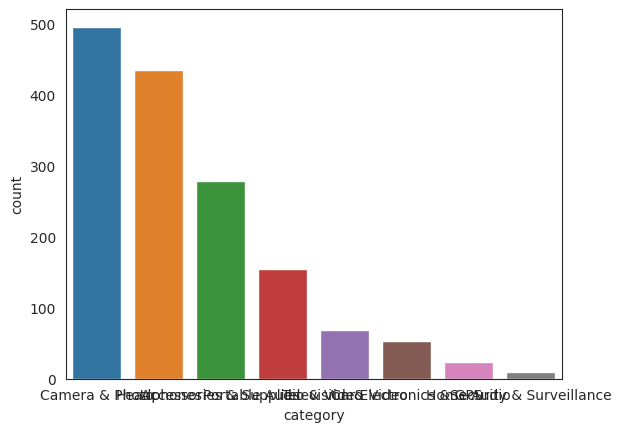

In [76]:
# What products by category were sold the most in January
sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index)

The top 3 products sold in January were Computers & Accesories, Camera & Photo and Accesories & Supplies.


<Axes: xlabel='category', ylabel='count'>

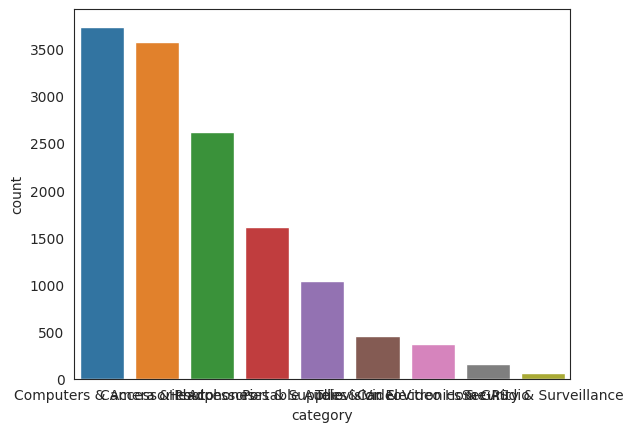

In [77]:
# Category with the least sales
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)

The category with the least sales was Security & Surveillance while the most sales were Headphones.

<Axes: ylabel='rating'>

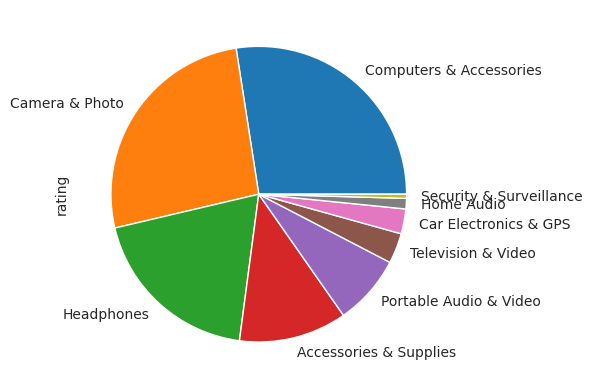

In [78]:
# distribution of sales presented in a pie chart
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')



conclusion of our analysis

- We can see that the year 2015 had the best sales.

- The month of January had the best sales.

- We can see that the brands Bose and Logitech sold the most

- We can see that the category of Headphones sold the most.

- We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

- We can see that the category of Security and Surveillance sold the least.

